In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [4]:
# Create 3-d array of data
size = np.array([2,3,4])
array_3d = np.arange(24).reshape(size)

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [5]:
# Create a tensor
array_5d = np.ones(720).reshape((2, 3, 4, 5, 6))
array_5d = array_5d*5
# Create tensor
tensor1 = Tensor(array_5d)

In [6]:
# Calculate Frobenious norm
print('Frobenious norm: {:.3f}'.format(tensor1.frob_norm))

Frobenious norm: 134.164


### Solution: Part 2

In [7]:
# Create tensors and collect information
num = 8
size = (2,2,2)
add_s = (2,)
order = np.ones(18)
num_element = np.ones(18)
for o in range(3,21):
    array_create = np.ones(num).reshape(size)
    tensor_create = Tensor(array_create)
    size = size + add_s
    num = num*2
    order[o-3] = tensor_create.order
    num_element[o-3] = tensor_create.size

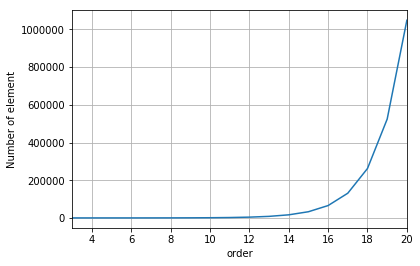

In [8]:
# Plot results
fig, ax = plt.subplots()
ax.plot(order, num_element)
ax.set(xlabel='order', ylabel='Number of element')
plt.xlim(3,20)
ax.grid()
plt.show()

### Solution: Part 3

In [9]:
# Create tensors and collect information
size = np.array([3,3,3])
num_element = np.ones(13)
for s in range(3,16):
    num = s**3
    array_create = np.ones(num).reshape(size)
    tensor_create = Tensor(array_create)
    size = size + 1 
    num_element[s-3] = tensor_create.size

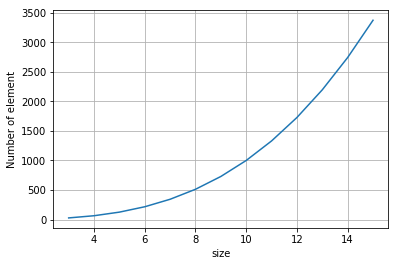

In [10]:
# Plot results
size_dim = np.arange(3,16)
fig, ax = plt.subplots()
ax.plot(size_dim, num_element)
ax.set(xlabel='size', ylabel='Number of element')
#plt.xlim(3,20)
ax.grid()
plt.show()

### Solution: Part 4

In the part 2, the size of each dimension is 2 and the number of dimensions increase from 3 to 20. The relationship between the number of elements with the order of the tensor is 2^n. In the part 3, the number of dimensions keeps 3, while the size of each dimentsion varies from 3 to 15. The relationship between them is m^3. The number of elements of tensor can be decided by m^n, if all the dimenstions of the tensor have same size.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [11]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [12]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [18]:
# Create a tensor of order 4
size = np.array([3,3,3,3])
array_ass2 = np.arange(81).reshape(size)
tensor_ass2 = Tensor(array_ass2)
print(tensor_ass2)

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [27]:
# Display slices
for i in range(3):
    for j in range(3):
        slice_ass2 = tensor_ass2.data[j,:,:,i]
        print(slice_ass2)

[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
[[27 30 33]
 [36 39 42]
 [45 48 51]]
[[54 57 60]
 [63 66 69]
 [72 75 78]]
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
[[28 31 34]
 [37 40 43]
 [46 49 52]]
[[55 58 61]
 [64 67 70]
 [73 76 79]]
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]
[[29 32 35]
 [38 41 44]
 [47 50 53]]
[[56 59 62]
 [65 68 71]
 [74 77 80]]


In [32]:
# Display fibers
for i in range(3):
    fiber_ass2 = tensor_ass2.data[i,:,1,1]
    print(fiber_ass2)
for i in range(2):
    fiber_ass2 = tensor_ass2.data[i,:,2,1]
    print(fiber_ass2)

[ 4 13 22]
[31 40 49]
[58 67 76]
[ 7 16 25]
[34 43 52]


### Solution: Part 2

In [34]:
# Create a tensor of order 3
size = np.array([4,2,5])
array_ass2_2 = np.ones(40).reshape(size)
for i in range(1,5):
    array_ass2_2[:,:,i] = 2*array_ass2_2[:,:,i-1]
tensor_ass2_2 = Tensor(array_ass2_2)
print(tensor_ass2_2)
for ii in range(5):
    fiber_ass2_2 = tensor_ass2_2.data[:,:,ii]
    print(fiber_ass2_2)

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
[[4. 4.]
 [4. 4.]
 [4. 4.]
 [4. 4.]]
[[8. 8.]
 [8. 8.]
 [8. 8.]
 [8. 8.]]
[[16. 16.]
 [16. 16.]
 [16. 16.]
 [16. 16.]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [35]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [36]:
# Create a tensor
array_ass3 = np.arange(360).reshape((6, 5, 4, 3))
tensor_ass3 = Tensor(array_ass3)

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.

In [38]:
# Display unfolded version
tensor_ass3.unfold(mode=1)
print(tensor_ass3)
tensor_ass3.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 300, 301, 302, 303, 304,
        305, 306, 307, 308, 309, 310, 311],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 252, 253, 254, 255,
        256, 257, 258, 259, 260, 261, 262, 263, 312, 313, 314, 315, 316,
        317, 318, 319, 320, 321, 322, 323],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95, 144, 145,
        146, 147, 148, 149, 150, 151

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [49]:
# Create original tensor 
I, J, K = 5, 4, 4
array_ass4 = np.arange(I * J * K).reshape(I, J ,K)
X_ass4 = Tensor(array_ass4)
print(X_ass4)
X_ass4.data

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (5, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]],

       [[64, 65, 66, 67],
        [68, 69, 70, 71],
        [72, 73, 74, 75],
        [76, 77, 78, 79]]])

In [50]:
# Create matrix
K_new = 5;
A_ass4 = np.arange(K_new*K).reshape(K_new,K)

In [51]:
# Perform mode-n product 
Y_ass4_1 = X_ass4.mode_n_product(A_ass4, mode=2, inplace=False)
Y_ass4_2 = X_ass4.mode_n_product(A_ass4, mode=2, inplace=True)

In [52]:
# Validate equivalence between the left and right hand side
# Left side
print(Y_ass4_1)
print('Inplace is False: The tensor Y is {}'.format(Y_ass4_1.data))
# Right side
print(Y_ass4_2)
print('Inplace is True: The tensor Y is {}'.format(Y_ass4_2.data))

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (5, 4, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
Inplace is False: The tensor Y is [[[  14   38   62   86  110]
  [  38  126  214  302  390]
  [  62  214  366  518  670]
  [  86  302  518  734  950]]

 [[ 110  390  670  950 1230]
  [ 134  478  822 1166 1510]
  [ 158  566  974 1382 1790]
  [ 182  654 1126 1598 2070]]

 [[ 206  742 1278 1814 2350]
  [ 230  830 1430 2030 2630]
  [ 254  918 1582 2246 2910]
  [ 278 1006 1734 2462 3190]]

 [[ 302 1094 1886 2678 3470]
  [ 326 1182 2038 2894 3750]
  [ 350 1270 2190 3110 4030]
  [ 374 1358 2342 3326 4310]]

 [[ 398 1446 2494 3542 4590]
  [ 422 1534 2646 3758 4870]
  [ 446 1622 2798 3974 5150]
  [ 470 1710 2950 4190 5430]]]
This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (5, 4, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
Inplace is True: The tensor Y is [[[  14   38   62   86  110]
  [  38  126  214 

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [67]:
# Create tensor
I, J, K = 2, 3, 4
array_ass5 = np.arange(I * J * K).reshape(I, J ,K)
X_ass5 = Tensor(array_ass5)
print(X_ass5)
X_ass5.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [70]:
# Create matrices
I1_new = 4
I2_new = 5
J_new = 5
A1 = np.arange(I1_new*I).reshape(I1_new,I)
B2 = np.arange(I2_new*I1_new).reshape(I2_new,I1_new)
B1 = np.arange(J_new*J).reshape(J_new,J)

In [71]:
# Validate property 1
Y_ass5_1 = X_ass5.mode_n_product(A1, mode=0, inplace=False)
Z_ass5_1 = Y_ass5_1.mode_n_product(B1, mode=1, inplace=False)

Y_ass5_2 = X_ass5.mode_n_product(B1, mode=1, inplace=False)
Z_ass5_2 = Y_ass5_2.mode_n_product(A1, mode=0, inplace=False)

print(Z_ass5_1)
print('The left side: The tensor Y is {}'.format(Y_ass4_1.data))
print(Z_ass5_2)
print('The right side: The tensor Y is {}'.format(Y_ass4_2.data))

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (4, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
The left side: The tensor Y is [[[  14   38   62   86  110]
  [  38  126  214  302  390]
  [  62  214  366  518  670]
  [  86  302  518  734  950]]

 [[ 110  390  670  950 1230]
  [ 134  478  822 1166 1510]
  [ 158  566  974 1382 1790]
  [ 182  654 1126 1598 2070]]

 [[ 206  742 1278 1814 2350]
  [ 230  830 1430 2030 2630]
  [ 254  918 1582 2246 2910]
  [ 278 1006 1734 2462 3190]]

 [[ 302 1094 1886 2678 3470]
  [ 326 1182 2038 2894 3750]
  [ 350 1270 2190 3110 4030]
  [ 374 1358 2342 3326 4310]]

 [[ 398 1446 2494 3542 4590]
  [ 422 1534 2646 3758 4870]
  [ 446 1622 2798 3974 5150]
  [ 470 1710 2950 4190 5430]]]
This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (4, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
The right side: The tensor Y is [[[  14   38   62   86  110]
  [  38  126  214  302  

In [72]:
# Validate property 2
Y_ass5_3 = X_ass5.mode_n_product(A1, mode=0, inplace=False)
Z_ass5_3 = Y_ass5_3.mode_n_product(B2, mode=0, inplace=False)

#Y_ass5_4 = X_ass5.mode_n_product(B1, mode=0, inplace=False)
Z_ass5_4 = X_ass5.mode_n_product(np.dot(B2,A1), mode=0, inplace=False)

print(Z_ass5_3)
print('The left side: The tensor Y is {}'.format(Z_ass5_3.data))
print(Z_ass5_4)
print('The right side: The tensor Y is {}'.format(Z_ass5_4.data))

This tensor is of order 3 and consists of 60 elements.
Sizes and names of its modes are (5, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
The left side: The tensor Y is [[[ 408  470  532  594]
  [ 656  718  780  842]
  [ 904  966 1028 1090]]

 [[1176 1350 1524 1698]
  [1872 2046 2220 2394]
  [2568 2742 2916 3090]]

 [[1944 2230 2516 2802]
  [3088 3374 3660 3946]
  [4232 4518 4804 5090]]

 [[2712 3110 3508 3906]
  [4304 4702 5100 5498]
  [5896 6294 6692 7090]]

 [[3480 3990 4500 5010]
  [5520 6030 6540 7050]
  [7560 8070 8580 9090]]]
This tensor is of order 3 and consists of 60 elements.
Sizes and names of its modes are (5, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
The right side: The tensor Y is [[[ 408  470  532  594]
  [ 656  718  780  842]
  [ 904  966 1028 1090]]

 [[1176 1350 1524 1698]
  [1872 2046 2220 2394]
  [2568 2742 2916 3090]]

 [[1944 2230 2516 2802]
  [3088 3374 3660 3946]
  [4232 4518 4804 5090]]

 [[2712 3110 3508 3906]
  [4304 4702 5100 5498]
  [

### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [1]:
%%latex
Define the original tensor $\mathbf{X}\in \mathbb{R}^{I_1\times I_2\times ...\times I_N}$ and $A\in \mathbb{R}^{J\times I_n}$ and $B\in \mathbb{R}^{K\times I_n}$. The left side of the second property is
\begin{equation}
\mathbf{X}\times _{n}A\times _{n}B
\end{equation}
This formula can be calculated in two steps.
\begin{equation}
\mathbf{Y}=\mathbf{X}\times _{n}A\\
\mathbf{y}_{i_1 i_2 ... i_{n-1}\;ji_{n+1}\; ... i_N}=\sum_{i_n=1}^{I_n}x_{i_1 i_2 ... i_N}a_{j i_n}
\end{equation}
While $j$ is from $0$ to $J-1$, $y$ is an element of $Y$ and $x$ is an element of $X$.
\begin{equation}
\mathbf{Z}=\mathbf{Y}\times _{n}B\\
\mathbf{z}_{i_1 i_2 ... i_{n-1}\;ki_{n+1}\; ... i_N}=\sum_{j=1}^{J}y_{i_1 i_2 ... i_N}b_{k i_n}
=\sum_{j=1}^{J}\sum_{i_n=1}^{I_n}x_{i_1 i_2 ... i_N}a_{j i_n}b_{k i_n}
\end{equation}
As for the right side of the second property is
\begin{equation}
\mathbf{X}\times _{n}(BA)
\end{equation}
Firstly, the production result of matrxi B and A will be calculated.
\begin{equation}
\mathbf{C}=(BA)\\
\mathbf{c}_{k i_n} = \sum_{j=1}^{J}b_{k j}a_{j i_n}
\end{equation}
Then the result is
\begin{equation}
\mathbf{Z}=\mathbf{X}\times C\\
\mathbf{z}_{i_1 i_2 ... i_{n-1}\;ki_{n+1}\; ... i_N}= \sum_{i_n=1}^{I_n}x_{i_1 i_2 ... i_N}c_{k i_n}\\
\mathbf{z}_{i_1 i_2 ... i_{n-1}\;ki_{n+1}\; ... i_N}=\sum_{j=1}^{J}y_{i_1 i_2 ... i_N}b_{k i_n}
=\sum_{j=1}^{J}\sum_{i_n=1}^{I_n}x_{i_1 i_2 ... i_N}a_{j i_n}b_{k i_n}
\end{equation}
Hence, the left side of the second property is equal to the right side.

<IPython.core.display.Latex object>